In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from gauge import *
from method import PCGM, RPCGM
from problem import LeastSquares
from scalarfn import *



100 100


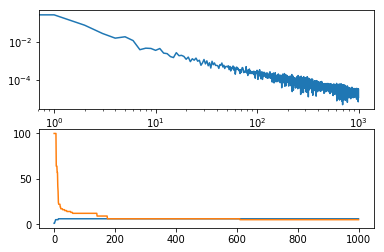

In [2]:

m = 100
n = 100
x = np.random.randn(n)
eta = 1.
seed = 0
prob = LeastSquares(m,n,x,eta,seed )
      
    
p = 2.
lam = .0001
gauge = OneNorm(n)
convexphi = Convex(MonomialAbs(p))
opts = {
    'maxiter': 1000,
    'track_period': 1,
}

tracklist = ['obj','gap','resbnd','nscreened','nnz']
method = PCGM(prob, gauge,convexphi, lam, opts, tracklist,xstart=np.zeros(n))
method.run()


plt.subplot(2,1,1)
plt.loglog(method.track['gap'])
plt.subplot(2,1,2)
plt.plot(method.track['nnz'])
plt.plot(n - method.track['nscreened'])

100 100


method.py:251: RuntimeWarning: invalid value encountered in sqrt
  self.resbnd = 2.*np.sqrt(self.L*self.res)*self.nonconvex.rmax
gauge.py:9: RuntimeWarning: invalid value encountered in greater
  return np.greater(res, resbnd)


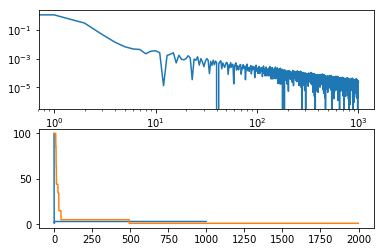

In [3]:

m = 100
n = 100
x = np.random.randn(n)
eta = 1.
seed = 0
prob = LeastSquares(m,n,x,eta,seed )
      
    
p = 2.
lam = .0001
boundary = .1
theta = 1.
gauge = OneNorm(n)
convexphi = Convex(MonomialAbs(p))
nonconvex =  LocallyNonconvex(LSP(theta = theta),boundary=boundary) 
opts = {
    'maxiter': 1000,
    'track_period': 1,
}

tracklist = ['obj','gap','resbnd','nnz','nscreened']
method = RPCGM(prob, gauge,convexphi, nonconvex, lam, opts, tracklist,xstart=np.ones(n))
method.run()



plt.subplot(2,1,1)
plt.loglog(method.track['gap'])
plt.subplot(2,1,2)
plt.plot(method.track['nnz'])
plt.plot(n - method.track['nscreened'])
